In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\All.csv')


In [2]:
df.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


In [3]:
unique_values = df['URL_Type_obf_Type'].unique()
print(unique_values)

df.info()


['Defacement' 'benign' 'malware' 'phishing' 'spam']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      36707 non-null  int64  
 1   domain_token_count               36707 non-null  int64  
 2   path_token_count                 36707 non-null  int64  
 3   avgdomaintokenlen                36707 non-null  float64
 4   longdomaintokenlen               36707 non-null  int64  
 5   avgpathtokenlen                  36427 non-null  float64
 6   tld                              36707 non-null  int64  
 7   charcompvowels                   36707 non-null  int64  
 8   charcompace                      36707 non-null  int64  
 9   ldl_url                          36707 non-null  int64  
 10  ldl_domain                       36707 non-null  int64  
 11  ldl_path                    

In [4]:
# Menghitung jumlah data untuk setiap label
label_counts = df['URL_Type_obf_Type'].value_counts()

# Menampilkan hasil
print(label_counts)

URL_Type_obf_Type
Defacement    7930
benign        7781
phishing      7586
malware       6712
spam          6698
Name: count, dtype: int64


In [5]:
# Group by 'URL_Type_obf_Type' and select the first row for each unique type
unique_rows = df.groupby('URL_Type_obf_Type', as_index=False).first()

# Display the unique rows in a table format in Jupyter Notebook
unique_rows

,URL_Type_obf_Type,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,...,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
0,Defacement,0,4,5,5.500000,14,4.400000,4,8,3,...,2,1,0,-1,0.726298,0.784493,0.894886,0.850608,0.000000,-1.0
1,benign,0,2,12,5.500000,8,4.083334,2,15,7,...,-1,-1,-1,-1,0.676804,0.860529,-1.000000,-1.000000,-1.000000,-1.0
2,malware,0,3,8,4.000000,5,21.500000,3,19,26,...,5,1,0,-1,0.648129,0.798231,0.820863,0.571441,0.725662,-1.0
3,phishing,166,3,31,3.666667,5,2.000000,3,57,44,...,-1,-1,-1,-1,0.600134,0.875275,-1.000000,-1.000000,-1.000000,-1.0
4,spam,0,4,4,4.750000,8,3.500000,4,3,1,...,1,1,0,-1,0.761381,0.829219,0.898227,1.000000,1.000000,-1.0


In [6]:
# Group the data by 'URL_Type_obf_Type' and calculate the mean of each numerical column
mean_values = df.groupby('URL_Type_obf_Type').mean()

# Simply display the DataFrame (works well in Jupyter)
mean_values

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
URL_Type_obf_Type,,,,,,,,,,,,,,,,,,,,,
Defacement,24.882598,3.015511,8.810593,5.655685,11.042875,3.126518,3.015511,16.056494,9.411980,0.717654,...,-0.091803,6.591551,5.581841,4.716015,0.727064,0.820279,0.645543,0.734075,0.677447,0.289336
benign,4.057705,2.082894,10.557255,5.270317,7.889988,4.882875,2.082894,15.723943,9.809922,0.755558,...,1.635137,1.310500,0.744377,0.123506,0.711942,0.883778,0.568955,0.583354,0.199674,-0.641047
malware,7.497467,2.706943,9.487038,5.275628,8.724374,4.668064,2.706943,12.945322,8.572408,1.459476,...,2.214690,3.939809,2.833582,2.314362,0.721213,0.848507,0.663595,0.706692,0.532947,-0.140865
phishing,2.818613,3.016346,6.343396,6.448547,12.219879,5.722125,3.016346,9.517269,6.950830,3.095966,...,2.619035,0.933957,0.250989,-0.448326,0.731676,0.823926,0.699844,0.783321,0.430505,-0.808700
spam,75.184234,3.540908,9.687519,4.194429,8.588683,4.483400,3.540908,21.048074,16.985369,11.738877,...,2.491042,5.397133,4.118841,2.892057,0.719434,0.835562,0.805423,0.778192,0.730271,0.314351


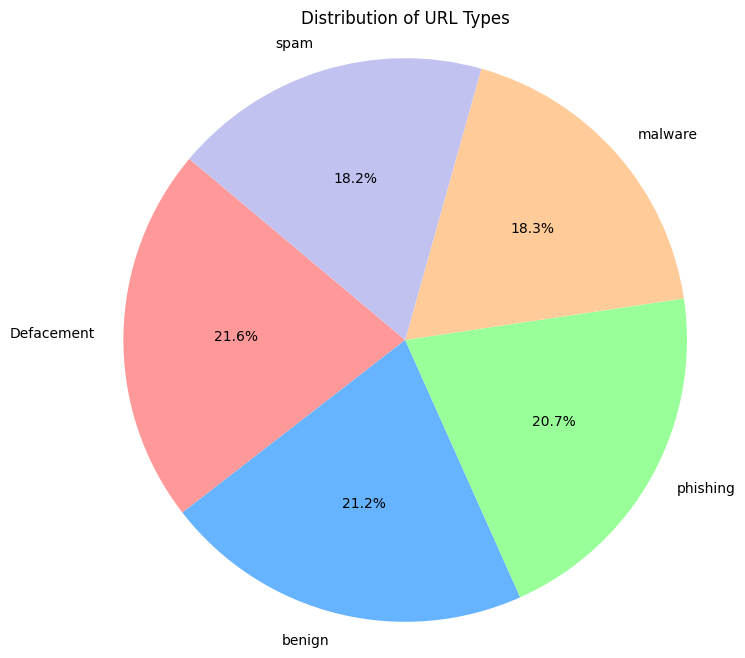

In [7]:
# Count the occurrences of each URL type
type_counts = df['URL_Type_obf_Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])

# Equal aspect ratio ensures the pie chart is drawn as a circle
plt.axis('equal')
plt.title("Distribution of URL Types")
plt.show()

Mean Query Lengths by URL Type:
URL_Type_obf_Type
Defacement    24.882598
benign         4.057705
malware        7.497467
phishing       2.818613
spam          75.184234
Name: Querylength, dtype: float64


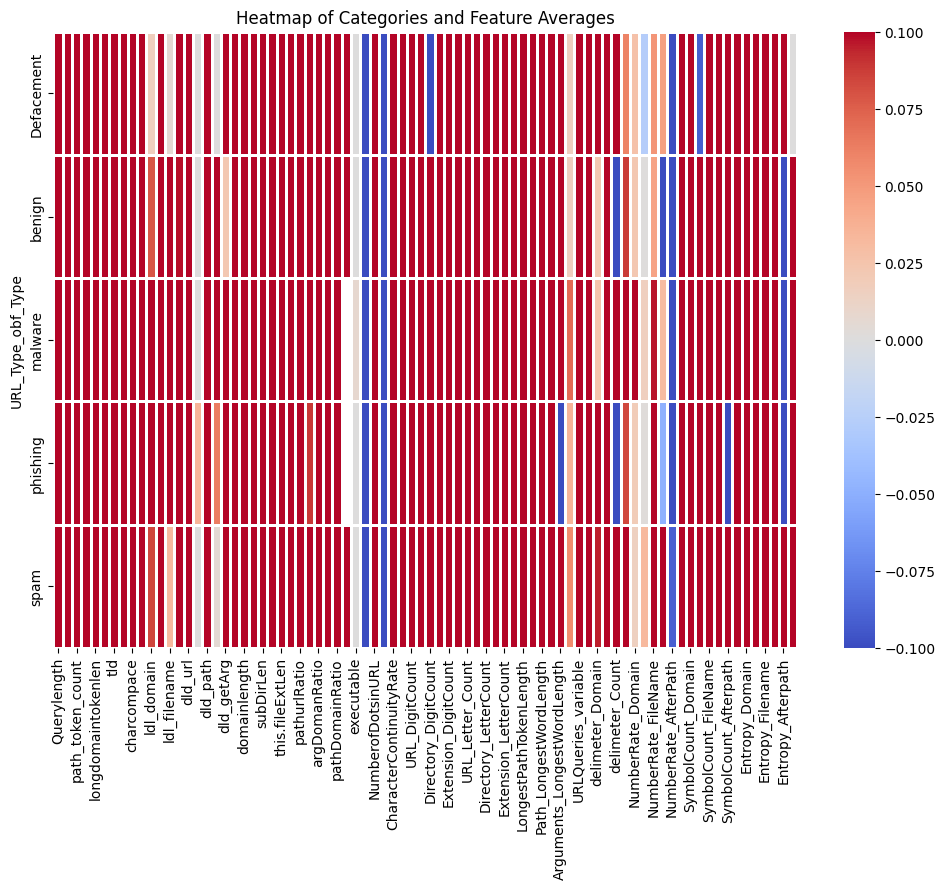

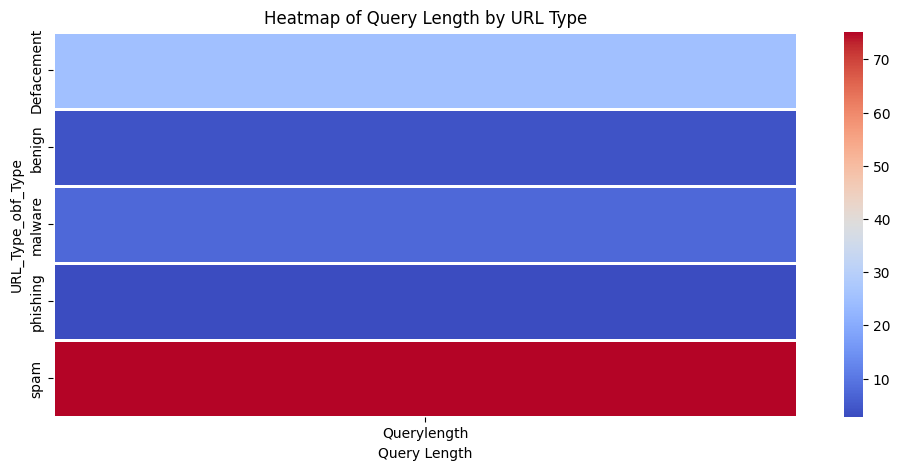

In [13]:
# Group the data by 'URL_Type_obf_Type' and calculate the mean of each numerical column
grouped_df = df.groupby('URL_Type_obf_Type').mean()

# Print out the mean values for 'querylength' to compare directly
print("Mean Query Lengths by URL Type:")
print(grouped_df['Querylength'])  # Adjust this to match your actual column name

# Plot the heatmap (focusing on selected features if needed)
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_df, cmap='coolwarm', cbar=True, linewidths=1)
plt.title('Heatmap of Categories and Feature Averages')
plt.show()

# Optionally, create a focused heatmap for a specific feature like 'querylength'
plt.figure(figsize=(12, 5))
sns.heatmap(grouped_df[['Querylength']], cmap='coolwarm', cbar=True, linewidths=1)
plt.title('Heatmap of Query Length by URL Type')
plt.xlabel('Query Length')
plt.show()

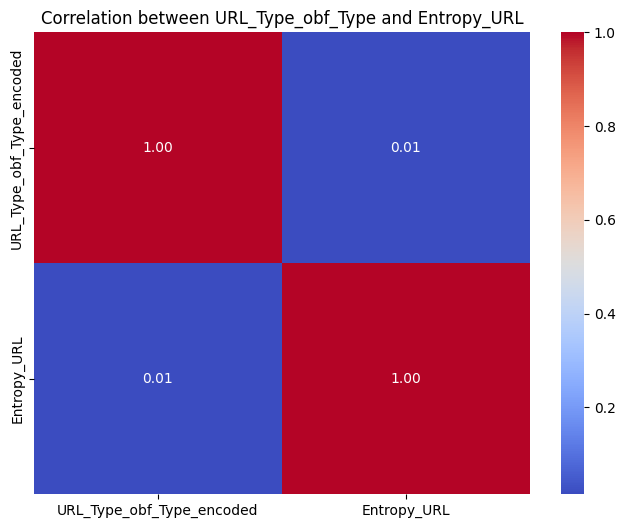

In [9]:
# Membuat LabelEncoder untuk mengubah nilai kategori menjadi angka
le = LabelEncoder()

# Ubah kolom kategori menjadi numerik
df['URL_Type_obf_Type_encoded'] = le.fit_transform(df['URL_Type_obf_Type'])

# Menghitung korelasi antara kolom yang sudah diencode
correlation_matrix = df[['URL_Type_obf_Type_encoded', 'Entropy_URL']].corr()

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between URL_Type_obf_Type and Entropy_URL')
plt.show()


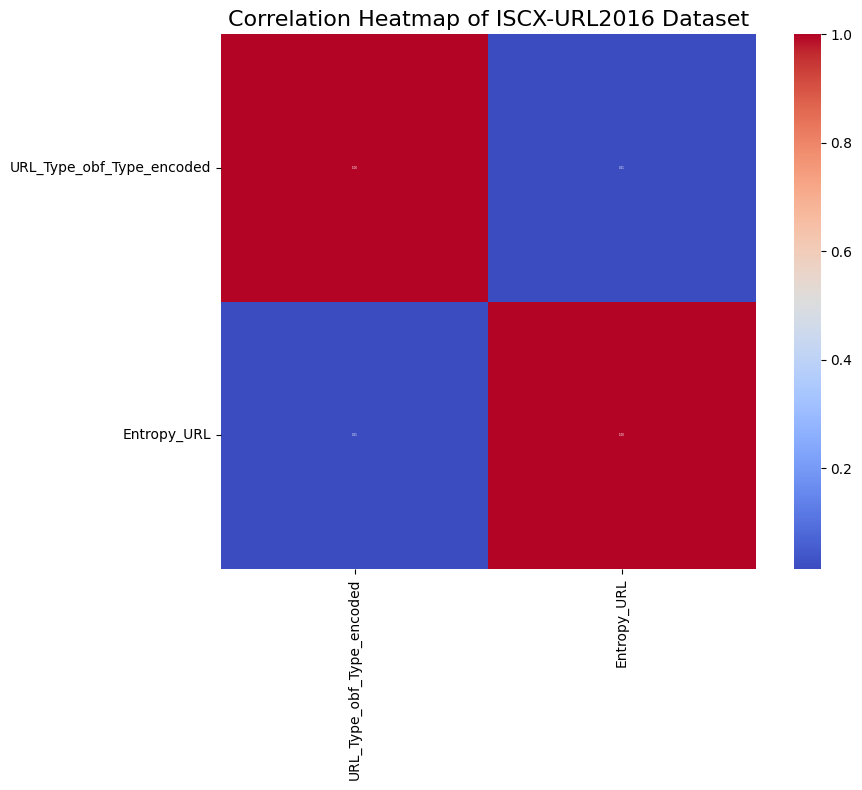

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90, fontsize=10)

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, annot_kws={"size": 2})

# Set titles and labels
plt.title('Correlation Heatmap of ISCX-URL2016 Dataset', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

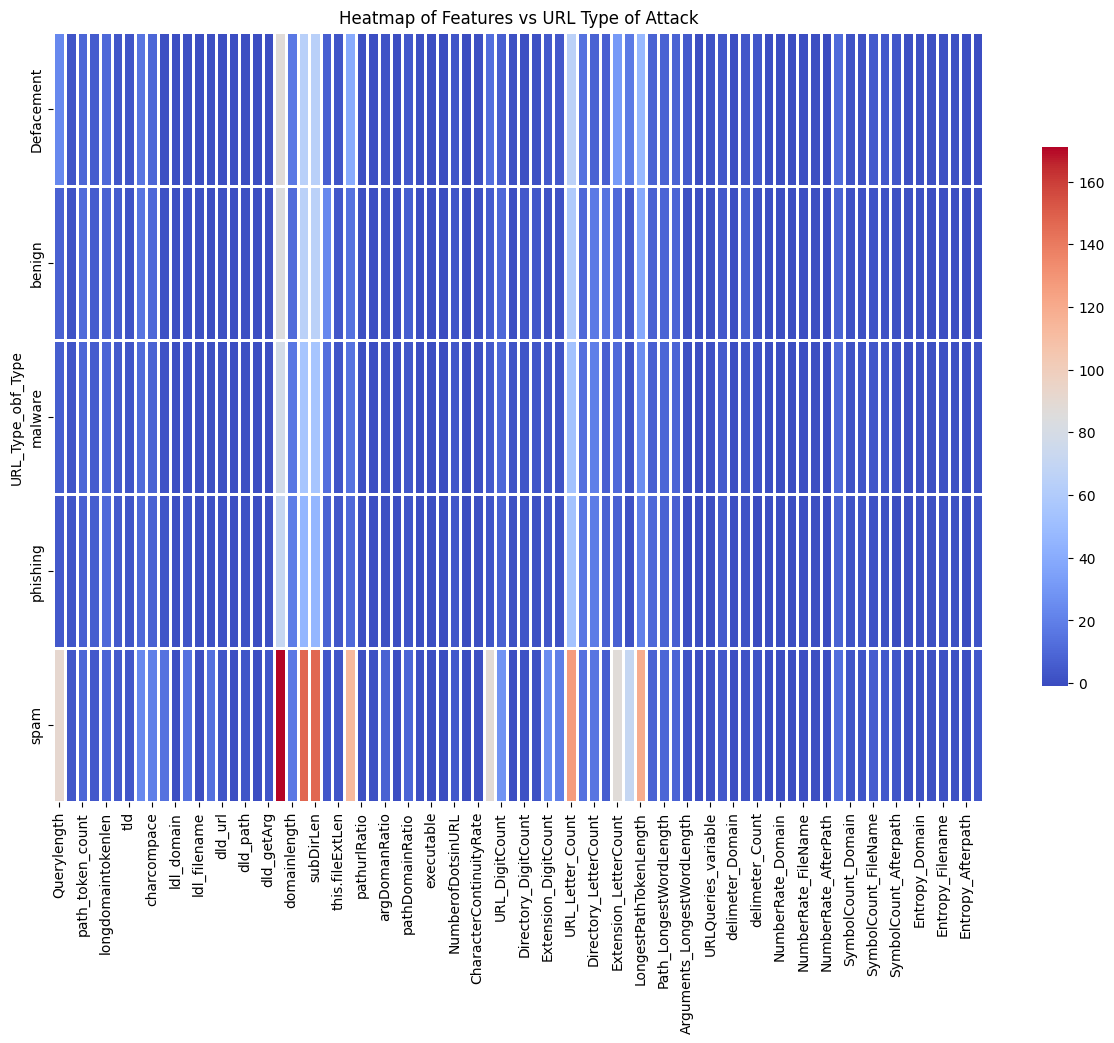

In [16]:
# Group by 'URL_Type_obf_Type' and calculate the mean of each feature
grouped_df = df.groupby('URL_Type_obf_Type').mean()

# Set the figure size for the heatmap
plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(grouped_df, cmap='coolwarm', cbar=True, cbar_kws={'shrink': 0.7},  annot=False, linewidths=1)


# Add a title to the heatmap
plt.title('Heatmap of Features vs URL Type of Attack')

# Display the heatmap
plt.show()


In [12]:
# Memilih hanya kolom numerik untuk 'train'
numeric_train = train.select_dtypes(include=['number'])

# Membuat heatmap dengan seaborn
plt.figure(figsize=(40, 30))
sns.heatmap(numeric_train.corr(), annot=True)
# sns.heatmap(numeric_train.corr(), annot=True, cmap='coolwarm')

plt.title('Heatmap Korelasi (Seaborn)')
plt.show()

# Memilih hanya kolom numerik untuk 'df'
numeric_df = df.select_dtypes(include=['number'])

# Membuat heatmap dengan plotly
fig = px.imshow(numeric_df.corr(), text_auto=True, aspect="auto")
fig.update_layout(title='Heatmap Korelasi (Plotly)')
fig.show()

NameError: name 'train' is not defined

In [15]:
# Check for null values in the dataset
null_values = df.isnull().sum()

# Display the null values in each column
print("Null values in each column:")
print(null_values)

Null values in each column:
Querylength                  0
domain_token_count           0
path_token_count             0
avgdomaintokenlen            0
longdomaintokenlen           0
                            ..
Entropy_Filename             0
Entropy_Extension            0
Entropy_Afterpath            0
URL_Type_obf_Type            0
URL_Type_obf_Type_encoded    0
Length: 81, dtype: int64


In [41]:
df 

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.500000,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.000000,Defacement
1,0,4,5,5.500000,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.000000,-1.000000,Defacement
2,0,4,5,5.500000,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.000000,-1.000000,Defacement
3,0,4,12,5.500000,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.000000,-1.000000,Defacement
4,0,4,6,5.500000,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.000000,-1.000000,Defacement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36702,29,4,14,5.750000,12,3.666667,4,20,24,3,...,3,2,7,0.690555,0.791265,0.777498,0.690227,0.656684,0.796205,spam
36703,0,4,13,3.750000,8,8.461538,4,24,23,0,...,16,15,-1,0.665492,0.820010,0.879588,0.674400,0.674671,-1.000000,spam
36704,58,3,27,6.666666,16,3.375000,3,41,34,20,...,8,7,9,0.656807,0.801139,0.684777,0.713622,0.717187,0.705245,spam
36705,35,3,13,4.333334,9,3.600000,3,15,13,7,...,9,8,3,0.725963,0.897617,0.871049,0.745932,0.758824,0.790772,spam


Cleaning

In [14]:
# Replace Inf and -Inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)